_**Download and save dataset**_

_**Bringing up dataset**_

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv('datasets/housing/housing.csv')

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


_**Plotting features**_

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

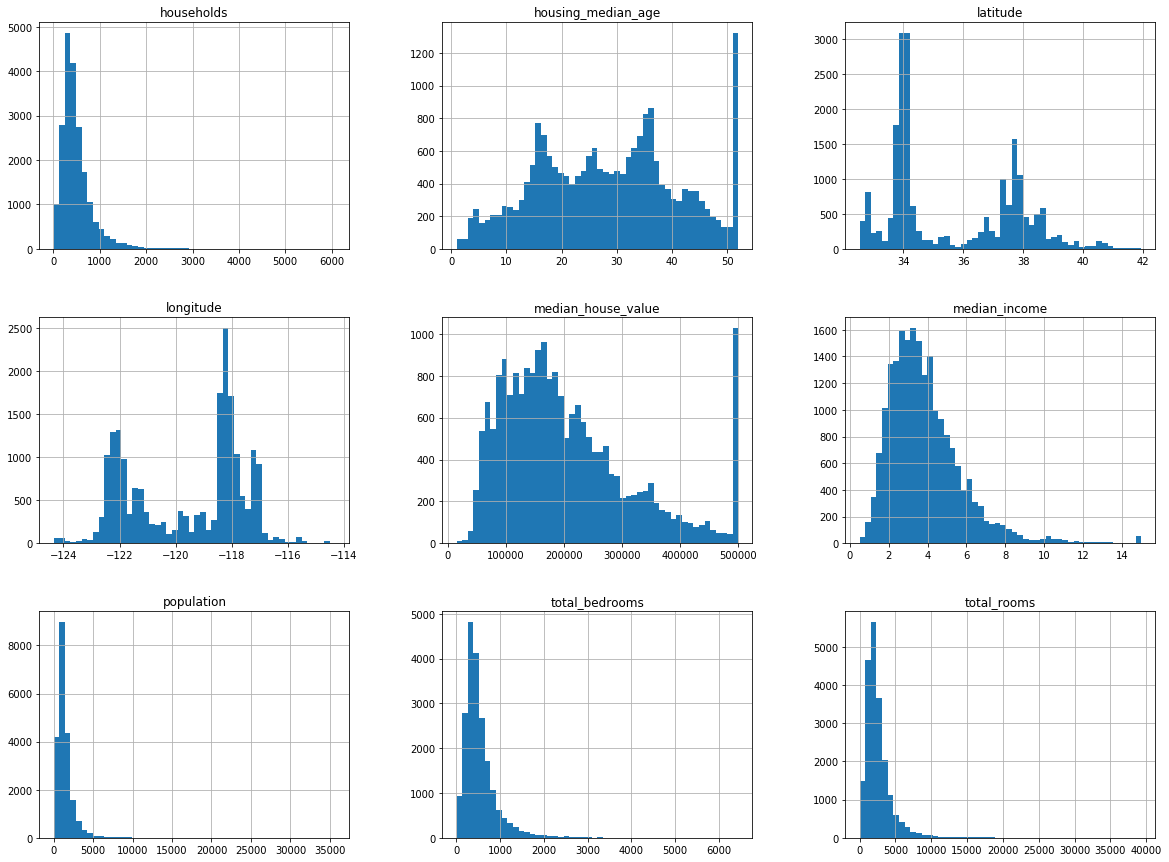

In [9]:
housing.hist(bins = 50, figsize=(20,15))
plt.show()

_**Splitting the dataset**_

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set,test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [12]:
import numpy as np

_**Categorize median income (target)**_<br>
_Split the median income into categories to manage our target feature [1,2,3,4,5]_ (5 or more will be 5.0)

In [104]:
housing['income_cat'] = np.ceil(housing["median_income"]/1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace = True)

In [14]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


_**Stratify our data**_ <br> _This is called stratified sampling: the population is divided into homogeneous subgroups called strata,and the right number of instances is sampled from each stratum to guarantee that the
test set is representative of the overall population._

In [105]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [18]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


In [19]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

In [20]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


**Discover and Vizualize the Data to Gain Insights**

In [21]:
housing = strat_train_set.copy()

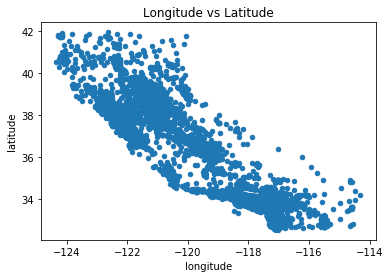

In [22]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')
plt.title('Longitude vs Latitude')
plt.show()

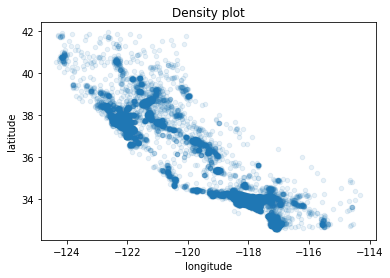

In [23]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)
plt.title('Density plot')
plt.show()

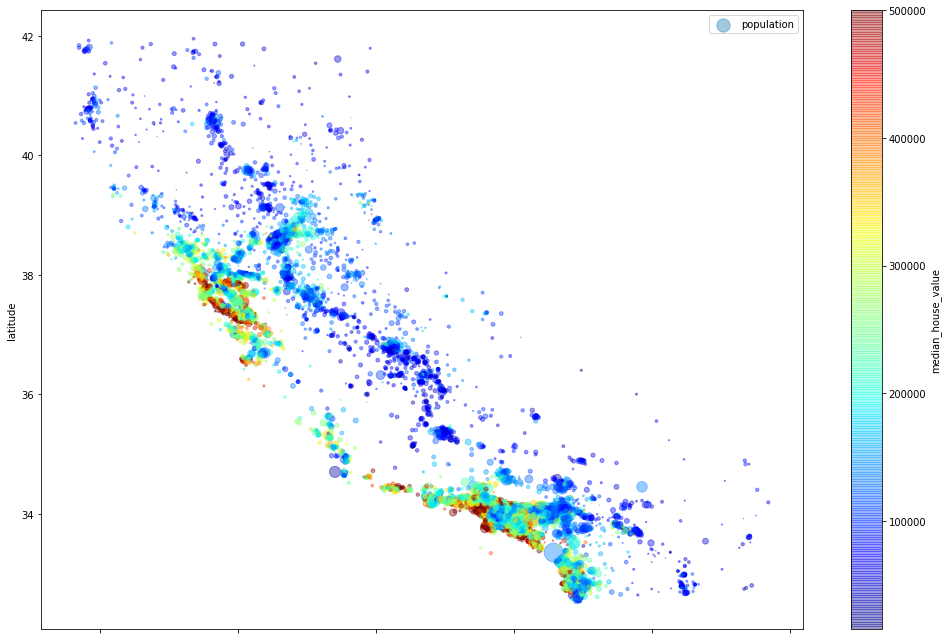

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, 
             label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, 
             figsize = (14,9))
plt.legend()
plt.tight_layout()
plt.show()

_**Looking for correlations**_

In [25]:
corr_matrix = housing.corr()

In [26]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [27]:
from pandas.plotting import scatter_matrix

In [28]:
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]

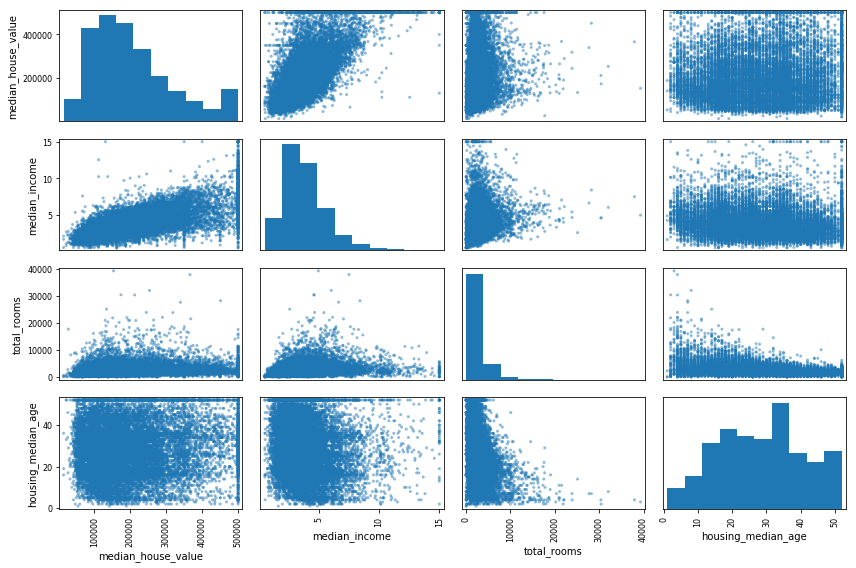

In [29]:
scatter_matrix(housing[attributes], figsize = (12,8))
plt.tight_layout()
plt.show()

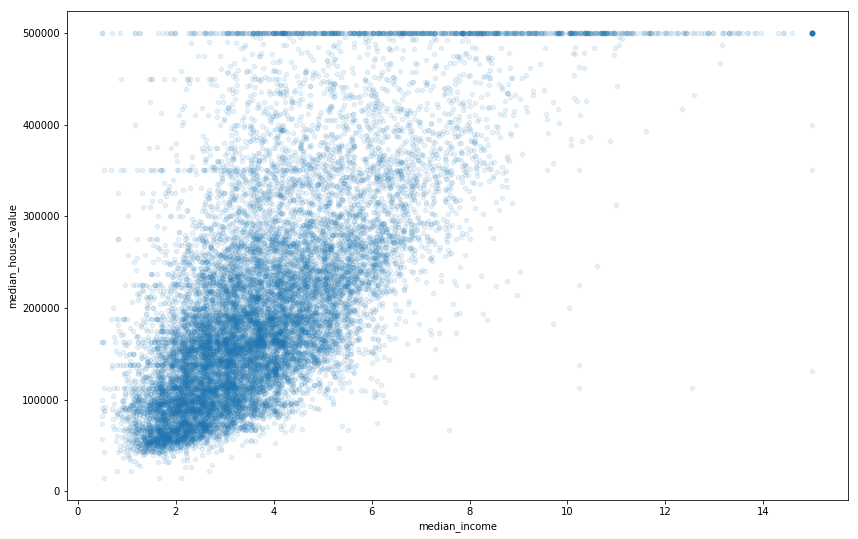

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1,figsize=(14,9))
plt.show()

_**Adding features to our data**_

In [31]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [32]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

**Prepare the Data for Machine Learning Algorithms**

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

_**Data Cleaning**_

In [34]:
#With Scikit-learn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

_SimpleImputer just works with numerical data, that's why we drop the 'ocean proximity' column_

In [35]:
housing_num = housing.drop('ocean_proximity', axis = 1)

In [36]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [37]:
X = imputer.transform(housing_num)

In [38]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [39]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


_**Handling Text and Categorical Attributes**_

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [41]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


_**Important Note:** earlier versions of the book used the LabelBinarizer or CategoricalEncoder classes to convert each categorical value to a one-hot vector. It is now preferable to use the OneHotEncoder class. Since Scikit-Learn 0.20 it can handle string categorical inputs (see PR #10521), not just integer categorical inputs. If you are using an older version of Scikit-Learn, you can import the new version from future_encoders.py:_<br> **from sklearn.preprocessing import OneHotEncoder**_

In [42]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output = True) 
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
housing_cat_1hot = housing_cat_1hot.toarray()

_**Custom Transformers**_

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

In [45]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [46]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]   

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [47]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In [106]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

_**Min-max scaling** (many people call this normalization) is quite simple: values are shifted and rescaled so that 
they end up ranging from 0 to 1. We do this by subtract‐ing the min value and dividing by the max minus the min._<br> _**Standardization** is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the variance so that the result‐
ing distribution has unit variance._

In [49]:
from sklearn.pipeline import Pipeline

_**Adding the tranformers into a Pipeline**_

In [50]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [51]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [52]:
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, X, y=0):
        self.encoder.fit(X)
        return self
    def transform(self, X, y=0):
        return self.encoder.transform(X)

In [53]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),])

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                         ('label_binarizer', MyLabelBinarizer()),])

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline)])

In [54]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

_**Machine Learning Regression Models**_

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", list(lin_reg.predict(some_data_prepared)))
print("Labels:\t\t", list(some_labels))

Predictions:	 [210644.60459285552, 317768.8069721082, 210956.43331178243, 59218.988868490764, 189747.55849878537]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [57]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_mse = np.sqrt(lin_mse)
lin_mse

68628.19819848923

In [58]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [59]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

_**Cross Validation**_<br> _With a rmse of 0 we can assume that our model is overfitting, so we can use Cross Validation to train our model in different folds to reduce the overfitting_

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

_Scikit-Learn cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a neg‐
ative value), which is why the preceding code computes -scores
before calculating the square root._

In [61]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [62]:
display_scores(tree_rmse_scores)

Scores: [67820.16255114 66670.46150985 71313.57955358 69760.07783829
 70694.51099683 75980.25410175 71457.04156017 70729.49768863
 76012.5019343  69947.39662873]
Mean: 71038.5484363285
Standard deviation: 2861.618623415374


In [63]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [64]:
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983493


In [65]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

/home/daniel_py/anaconda3/envs/Data_Practice/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [66]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21938.760155833133

In [67]:
%%time
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [53854.37707779 50705.90553301 53164.80904503 54167.00251105
 53291.28824723 55042.61508473 51523.77689408 51068.76289927
 54511.25695387 54076.31956195]
Mean: 53140.61138080175
Standard deviation: 1441.9628600478538
CPU times: user 14.5 s, sys: 54.6 ms, total: 14.5 s
Wall time: 14.5 s


_**Saving models and scores**_

In [68]:
from sklearn.externals import joblib

In [69]:
joblib.dump(forest_reg, 'forest_reg.pkl')
joblib.dump(scores, 'forest_scores.pkl')

['forest_scores.pkl']

In [70]:
#my_model_loaded = joblib.load('forest_reg.pkl')

In [71]:
#my_scores_loaded = joblib.load('forest_scores.pkl')

_**Fine-Tune Your Model**_

In [72]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

CPU times: user 56.4 s, sys: 22.6 ms, total: 56.4 s
Wall time: 56.4 s


In [73]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [74]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

_Performance of different hyperparameters combinations_

In [75]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64073.733566159084 {'max_features': 2, 'n_estimators': 3}
55969.95772618443 {'max_features': 2, 'n_estimators': 10}
52746.464042125 {'max_features': 2, 'n_estimators': 30}
61504.892134136615 {'max_features': 4, 'n_estimators': 3}
52897.1240343957 {'max_features': 4, 'n_estimators': 10}
50640.050052847146 {'max_features': 4, 'n_estimators': 30}
59421.506122323684 {'max_features': 6, 'n_estimators': 3}
52317.0431302681 {'max_features': 6, 'n_estimators': 10}
50108.87115766342 {'max_features': 6, 'n_estimators': 30}
58057.306173922865 {'max_features': 8, 'n_estimators': 3}
52042.42370675282 {'max_features': 8, 'n_estimators': 10}
50162.54750795802 {'max_features': 8, 'n_estimators': 30}
63715.297139747476 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54547.59980058801 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59649.44708374266 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52472.14388062805 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

_**Seeing features importance**_

In [76]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.88445931e-02, 6.38474560e-02, 4.25353596e-02, 1.87483701e-02,
       1.61872322e-02, 1.84714284e-02, 1.71071631e-02, 3.28654084e-01,
       5.87272462e-02, 1.07327204e-01, 7.43137604e-02, 1.54618797e-02,
       1.48778653e-01, 1.33066493e-04, 4.58335007e-03, 6.27915376e-03])

In [77]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.32865408436242755, 'median_income'),
 (0.148778652610374, 'INLAND'),
 (0.1073272037653398, 'pop_per_hhold'),
 (0.07884459312876817, 'longitude'),
 (0.07431376044642538, 'bedrooms_per_room'),
 (0.0638474560034357, 'latitude'),
 (0.05872724616921725, 'rooms_per_hhold'),
 (0.04253535963041171, 'housing_median_age'),
 (0.018748370141126822, 'total_rooms'),
 (0.01847142843484413, 'population'),
 (0.017107163077745794, 'households'),
 (0.01618723217675834, 'total_bedrooms'),
 (0.015461879728668212, '<1H OCEAN'),
 (0.006279153761414303, 'NEAR OCEAN'),
 (0.004583350070019845, 'NEAR BAY'),
 (0.00013306649302303203, 'ISLAND')]

In [78]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47861.327668223916

_**Exercises**_

In [85]:
from sklearn.svm import SVR

In [86]:
svm_reg = SVR()
svm_reg

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [87]:
%%time
svm_reg.fit(housing_prepared,housing_labels)

/home/daniel_py/anaconda3/envs/Data_Practice/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


CPU times: user 19.7 s, sys: 92 ms, total: 19.7 s
Wall time: 19.6 s


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
housing_predictions = svm_reg.predict(housing_prepared)

In [89]:
housing_predictions

array([179129.79627497, 179949.04858758, 179169.68844258, ...,
       179278.87757027, 179686.33339929, 179543.62534073])

In [91]:
svm_mse =mean_squared_error(housing_labels, housing_predictions)

In [92]:
svm_rmse = np.sqrt(svm_mse)
svm_rmse

118577.43356412371

In [113]:
%%time
scores = cross_val_score(svm_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
svm_reg_rmse_scores = np.sqrt(-scores)
display_scores(svm_reg_rmse_scores)
import warnings
warnings.filterwarnings(action="ignore")

/home/daniel_py/anaconda3/envs/Data_Practice/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/daniel_py/anaconda3/envs/Data_Practice/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/daniel_py/anaconda3/envs/Data_Practice/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Futu

Scores: [111393.33263237 119546.71049753 116961.00489445 120449.0155974
 117622.20149716 122303.76986818 117640.09907103 121459.63518806
 120348.51364519 118025.61954959]
Mean: 118574.99024409598
Standard deviation: 2934.1329433145675
CPU times: user 2min 44s, sys: 848 ms, total: 2min 45s
Wall time: 2min 43s


In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=7, cv=3, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=-1, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=7, n_jobs=-1,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe2389c8d30>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe2390f8d68>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [96]:
rnd_search.best_params_

{'C': 26290.206464300216, 'gamma': 0.9084469696321253, 'kernel': 'rbf'}

In [100]:
housing_predictions = rnd_search.predict(housing_prepared)

In [102]:
svm_mse =mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

56701.02355830243